# Programming Task 3  
**Student name**: Umut Demirhan <br> 
**Student number**:46739106  <br> 
**Unit Code**: BUSA8001  <br> 
**Unit name**: Applied Predictive Analytics  <br> 
**Lecturer's Name**: George Milunovich  <br> 
**Assignment Title**: Programming Task 3 - Jupyter Notebook Assignment <br> 
**Due Date**: Friday of Week 11 at 11:59pm    

In [1]:
# First, let's import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('data/data.csv') 

In [2]:
# Check the first few rows of the data
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


No missing values; assuming data is clean and ready to analyze

## Exploratory Data Analysis

In [4]:
# Summary Statistics for numerical variables
df.describe()
# summary_stats = df.describe()
# output_path = 'summary_stats.xlsx' 
# summary_stats.to_excel(output_path, index=True) # this is for the report 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


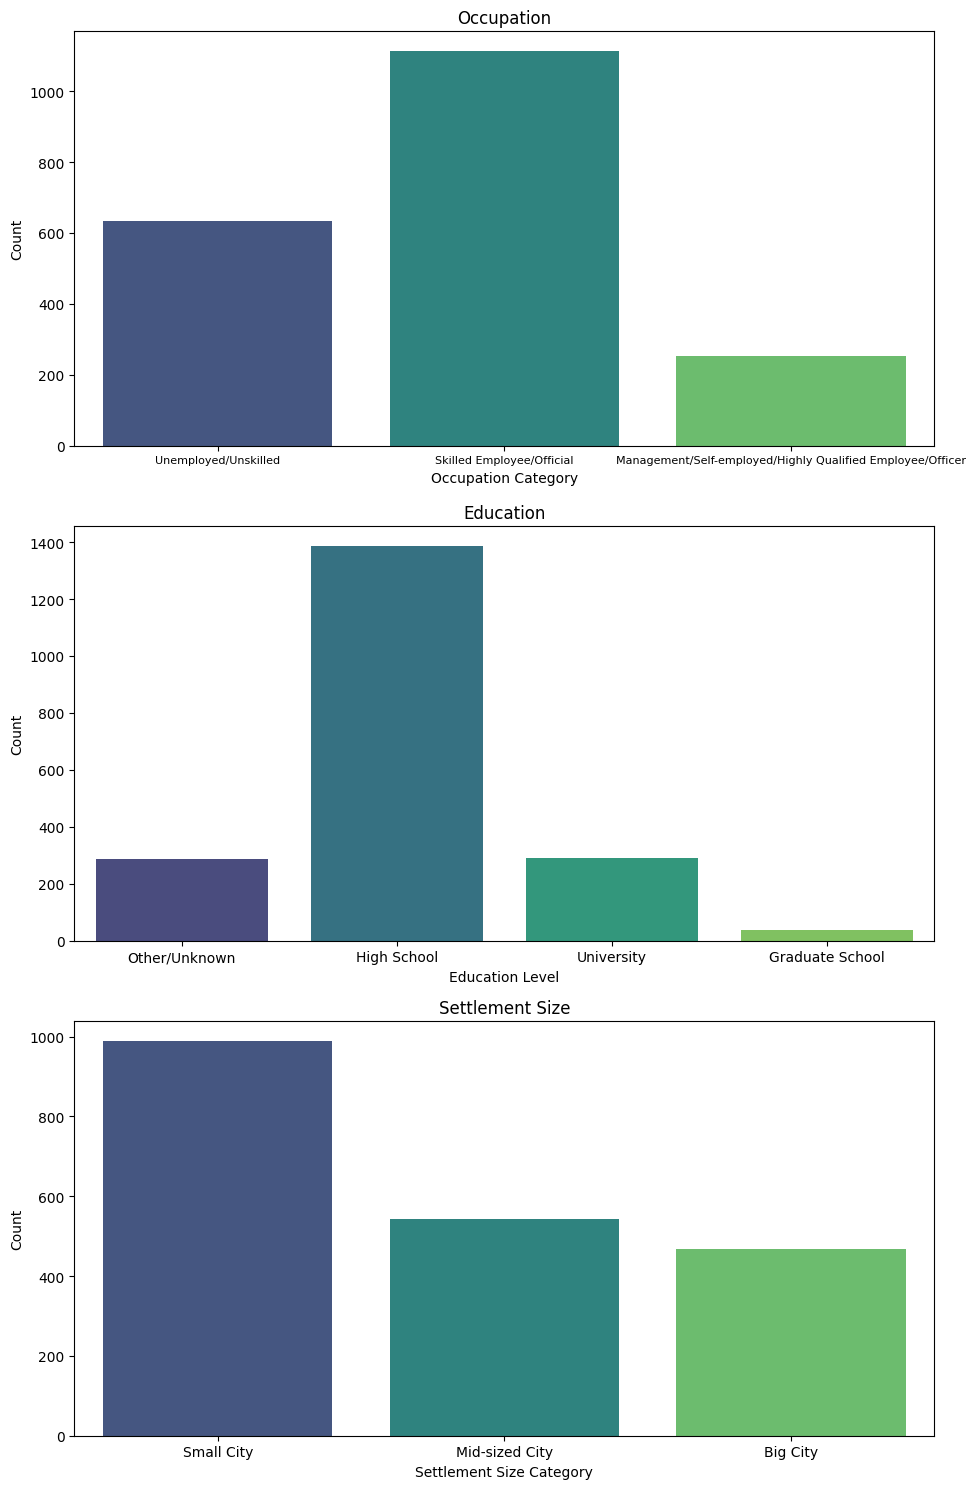

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Occupation bar chart
sns.countplot(x='Occupation', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Occupation')
ax[0].set_xlabel('Occupation Category')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Unemployed/Unskilled', 'Skilled Employee/Official', 
                       'Management/Self-employed/Highly Qualified Employee/Officer'], fontsize=8)

# Education bar chart
sns.countplot(x='Education', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Education')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Other/Unknown', 'High School', 'University', 'Graduate School'])

# Settlement size bar chart
sns.countplot(x='Settlement size', data=df, palette='viridis', ax=ax[2])
ax[2].set_title('Settlement Size')
ax[2].set_xlabel('Settlement Size Category')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(['Small City', 'Mid-sized City', 'Big City'])

plt.tight_layout()
# plt.savefig('Bar_chats.png') # this is for the report
plt.show()

In [6]:
high_school_graduates_percentage = (df[df['Education'] == 1].shape[0] / df.shape[0]) * 100
print(f"Percentage of high school graduates: {high_school_graduates_percentage:.2f}%")

Percentage of high school graduates: 69.30%


<Figure size 4800x3600 with 0 Axes>

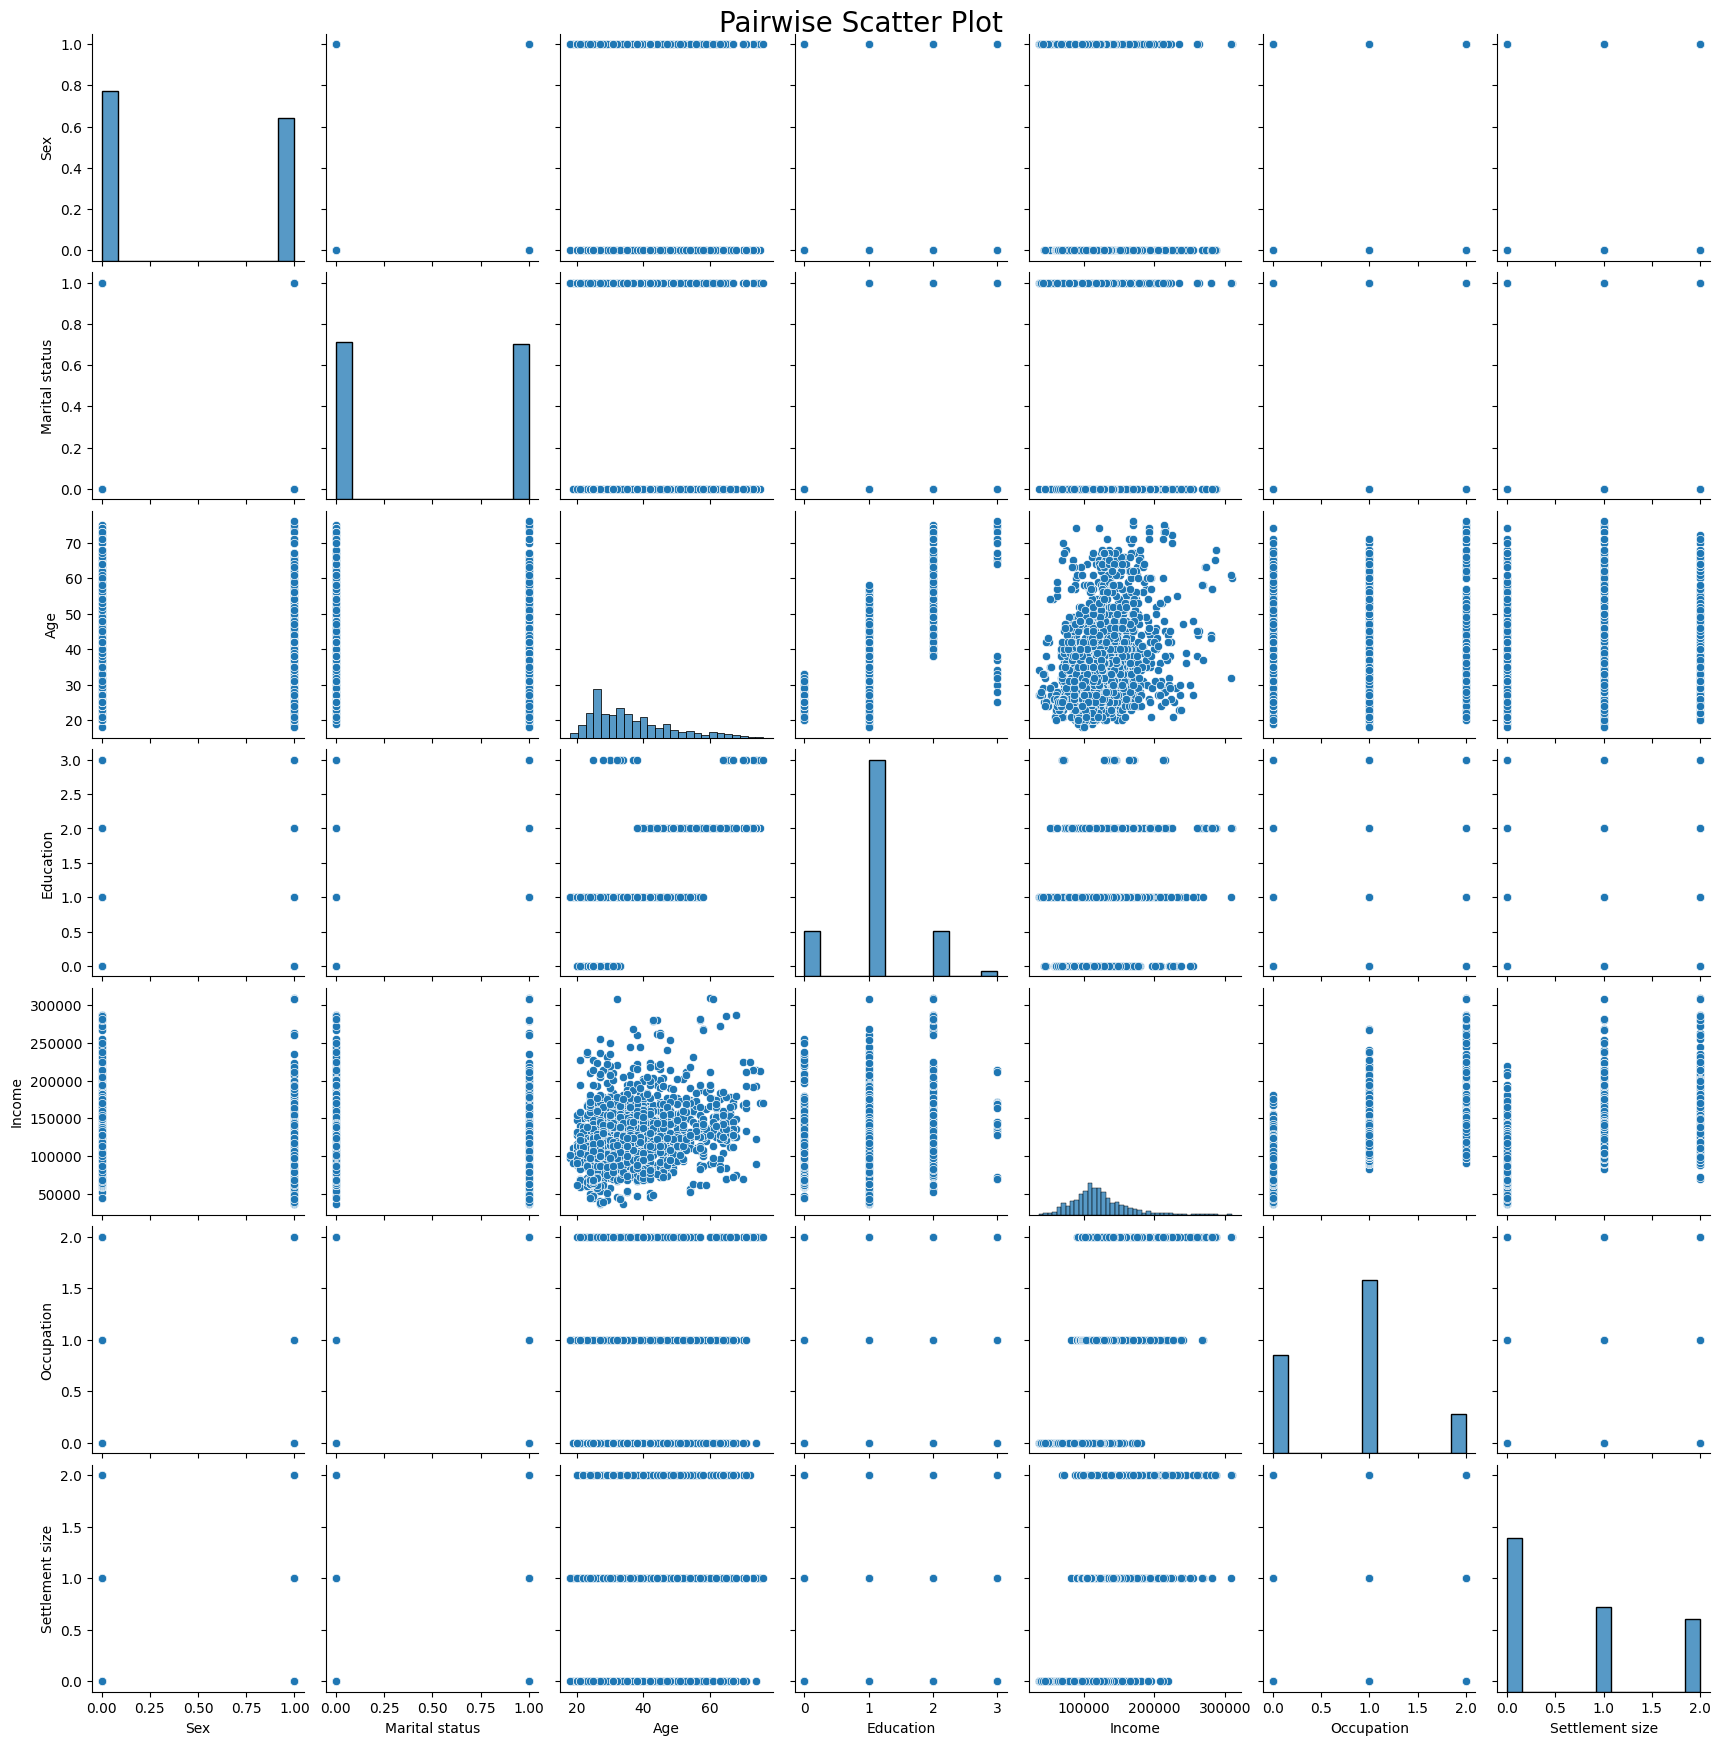

In [7]:
plt.figure(figsize=(8, 6), dpi=600)
# Plotting a scatter plot matrix of all numerical columns except 'ID'
sns.pairplot(data=df.drop('ID', axis=1))
plt.suptitle('Pairwise Scatter Plot', fontsize=20, y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('Scatter_plot.png') # this is for the report
plt.show()

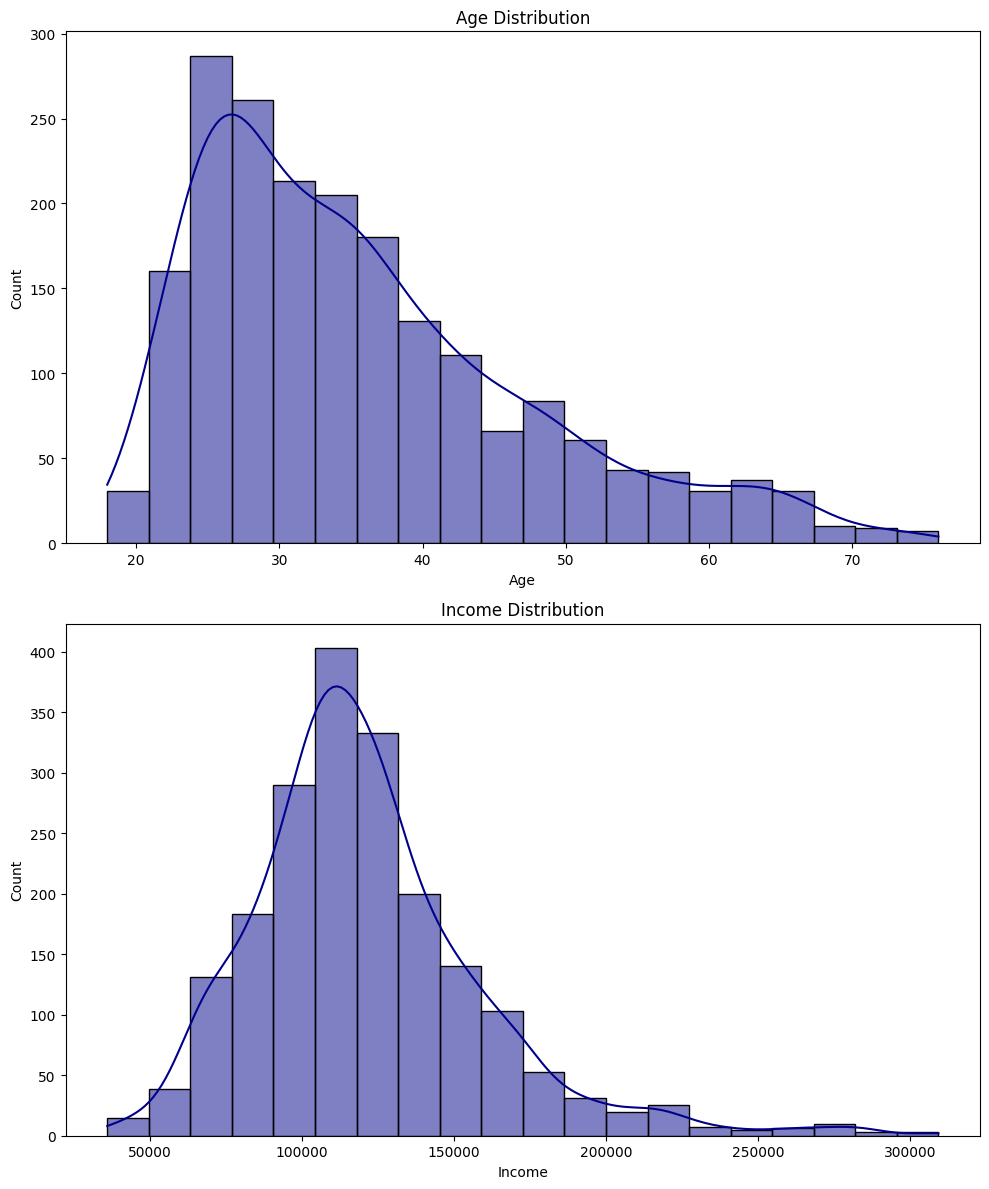

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Age histogram
sns.histplot(df['Age'], bins=20, color='darkblue', kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Income histogram
sns.histplot(df['Income'], bins=20, color='darkblue', kde=True, ax=ax[1])
ax[1].set_title('Income Distribution')
ax[1].set_xlabel('Income')

plt.tight_layout()
# plt.savefig('Histogram.png') # this is for the report
plt.show()

In [9]:
from scipy.stats import skew
# Checking the skewness of Age and Income variables
age_skewness = skew(df['Age'])
Income_skewness = skew(df['Income'])
print(f"Skewness of Age: {age_skewness}")
print(f"Skewness of Income: {Income_skewness}")

Skewness of Age: 1.0091824224176709
Skewness of Income: 1.195188179241448


The skewness of the 'Age' amd 'Income' variables are more than one, indicating a high positive skew. This means the  distributions for age and income of customers are skewed towards right. This suggests the supermarket chain has more younger customers and fewer older customers and has customers with lower/middle income.


            Income
Sex               
0    127775.225599
1    112850.047046


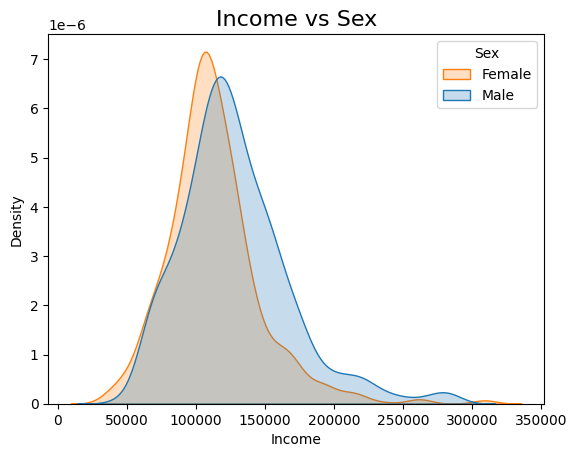

In [10]:
# Bivariate Analysis - income vs gender
print(df.groupby('Sex').agg({'Income': 'mean'}))
sns.kdeplot(data = df, x = 'Income', hue = 'Sex', fill = True)
plt.title('Income vs Sex', fontsize = 16)

# Update the legend
plt.legend(title='Sex', loc='upper right', labels=[ 'Female', 'Male',])

plt.show()

This outout suggest that the average income for males is higher than the average income for females in the dataset. 

Correlation between Income and Age: 0.3406101637317351


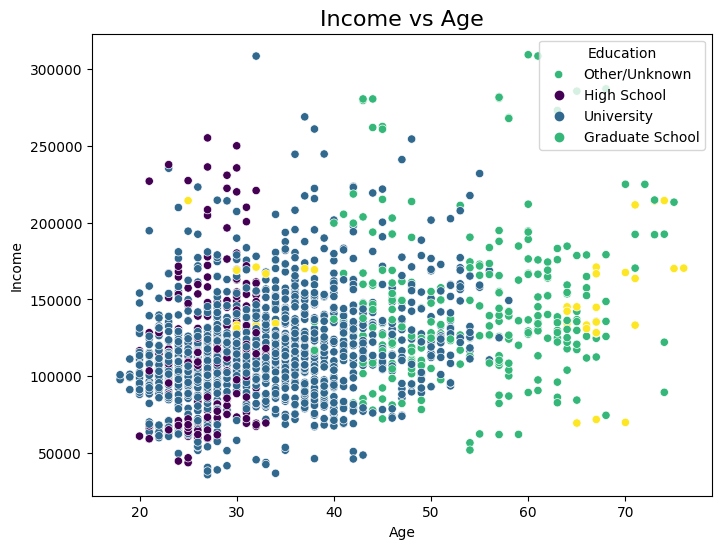

In [11]:
# Compute the correlation between age and income
correlation = df['Income'].corr(df['Age'])
print(f'Correlation between Income and Age: {correlation}')

# Create a scatter plot of income vs age, colorized by education level
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Education', palette='viridis')
plt.title('Income vs Age', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Income')

# Update the legend
plt.legend(title='Education', loc='upper right', labels=['Other/Unknown', 'High School', 'University', 'Graduate School'])

plt.show()

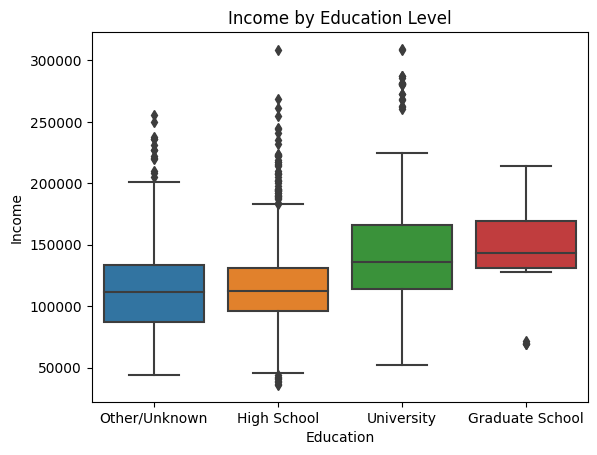

In [12]:
# Boxplot of Income by Education level
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xticks(ticks=[0,1,2,3], labels=['Other/Unknown', 'High School', 'University', 'Graduate School'])
plt.show()
# plt.savefig('Boxplot.png') # this is for the report

In [13]:
# Compute the correlation matrix
corr_matrix = df.drop('ID', axis=1).corr()
# Print the correlation matrix
corr_matrix
# correlation_matrix = df.drop('ID', axis=1).corr()
# output_path2 = 'correlation_matrix.xlsx'  
# correlation_matrix.to_excel(output_path2, index=True) # this is for the report

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


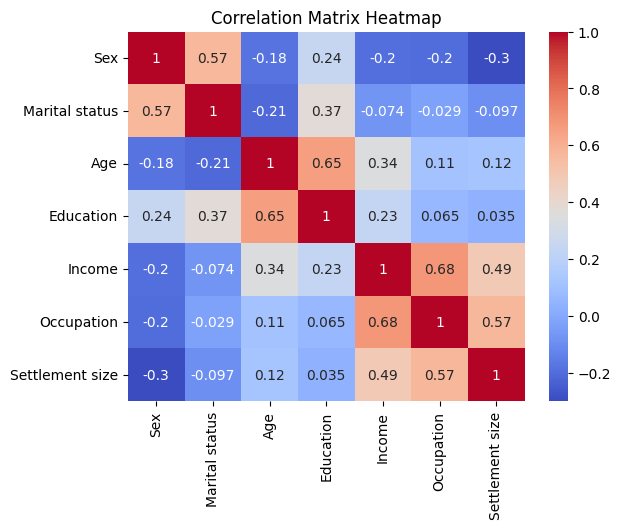

In [14]:
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Add title and show the plot
plt.title('Correlation Matrix Heatmap')
# plt.savefig('heatmap.png') # this is for the report
plt.show()

According to the heatmap, Income and Occupation are quite correlated, as are Age and Education. This suggests higher-income customers tend to have more skilled occupations, and older customers tend to have higher levels of education. 

# Clustering Analysis

### 1. K-Means Clustering

In [15]:
# Separate continuous and categorical variables:
continuous_vars = ['Age', 'Income']
categorical_vars = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
df_continuous = df[continuous_vars]
df_categorical = df[categorical_vars]

# Standardize the continuous variables:
scaler = StandardScaler()
df_continuous_std = scaler.fit_transform(df_continuous)
df_continuous_std = pd.DataFrame(df_continuous_std, columns=continuous_vars)

# Concatenate standardized continuous and categorical variables:
df_std = pd.concat([df_continuous_std, df_categorical], axis=1)
df_std.head()

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
0,2.653614,0.097524,0,0,2,1,2
1,-1.187132,0.782654,1,1,1,1,2
2,1.117316,-0.833202,0,0,1,0,0
3,0.775916,1.328386,0,0,1,1,1
4,1.458716,0.736932,0,0,1,1,1


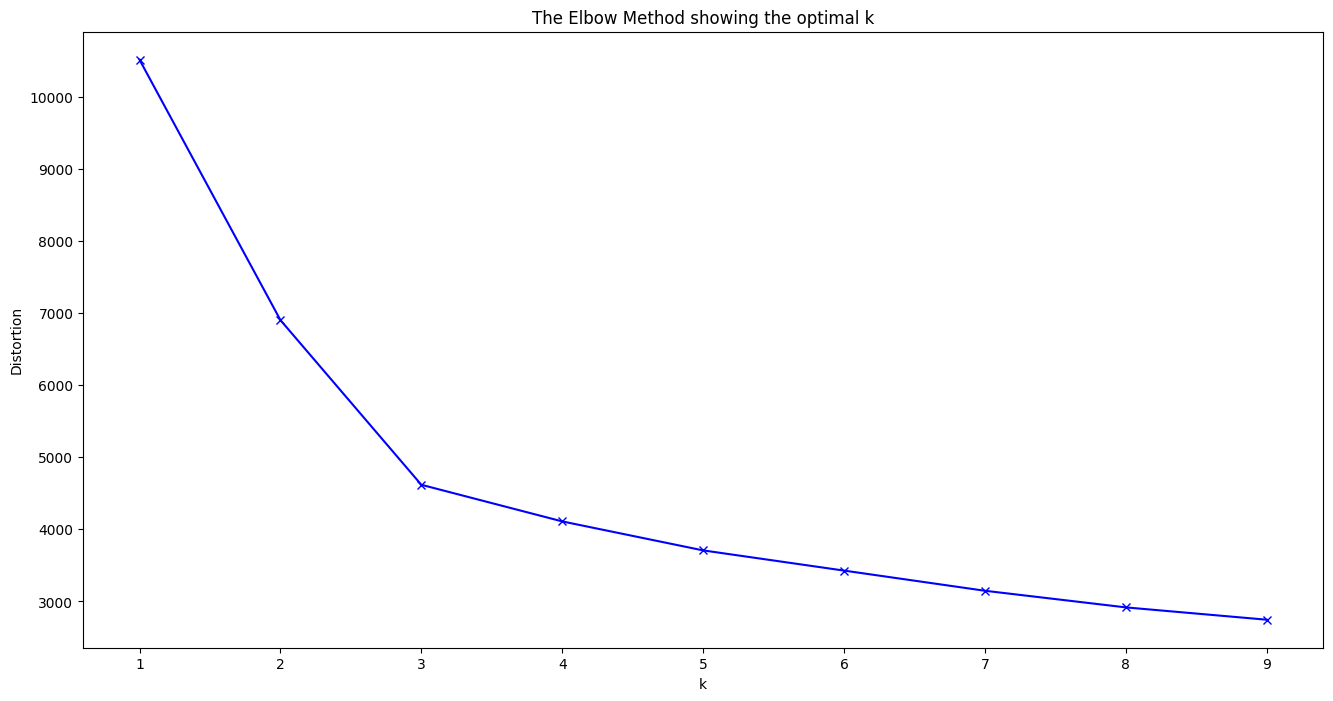

In [37]:
# Find optimal number of clusters using Elbow method for K-Means:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_std)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
# plt.savefig('Elbow_method.png') # this is for the report
plt.show()

In [17]:
# Perform K-means clustering with the optimal number of clusters
kmeans_model = KMeans(n_clusters=3,init='k-means++', random_state=0)
clusters_kmeans = kmeans_model.fit(df_std)

# Add  K-means Clusters to the datasets
df_std['kmeans_cluster'] = kmeans_model.labels_
df['kmeans_cluster'] = kmeans_model.labels_

In [33]:
df_clustered_kmeans = df.copy()
df_clustered_kmeans['Cluster'] = clusters_kmeans

cluster_characteristics_kmeans = df_clustered_kmeans.groupby('Cluster').agg({
    'Sex': lambda x: (x.sum()/x.count())*100,  # calculate the percentage of '1's ( females)
    'Marital status': lambda x: (x.sum()/x.count())*100,  # calculate the percentage of '1's (married individuals)
    'Age': 'mean',
    'Education': lambda x: x.mode(),
    'Income': 'mean',
    'Occupation': lambda x: x.mode(),
    'Settlement size': lambda x: x.mode()
}).reset_index()

# Renaming the columns
cluster_characteristics_kmeans.rename(columns={
    'Sex': 'Sex (% Female)', 
    'Marital status': 'Marital Status (% Married)', 
    'Age': 'Avg. Age', 
    'Education': 'Education (Mode)', 
    'Income': 'Avg. Income ($)', 
    'Occupation': 'Occupation (Mode)', 
    'Settlement size': 'Settlement Size (Mode)'
}, inplace=True)

cluster_characteristics_kmeans

,Cluster,Sex (% Female),Marital Status (% Married),Avg. Age,Education (Mode),Avg. Income ($),Occupation (Mode),Settlement Size (Mode)
0,0,25.295858,40.976331,31.900888,1,135840.051775,1,2
1,1,63.759086,56.905504,31.577362,1,97063.633437,0,0
2,2,35.734072,46.537396,54.969529,2,156810.759003,1,1


Please beware that values and clusters may change or switch every time you run the code above. Therefore, it may cause showing different results from the report.

### 2. Hierarchical Clustering

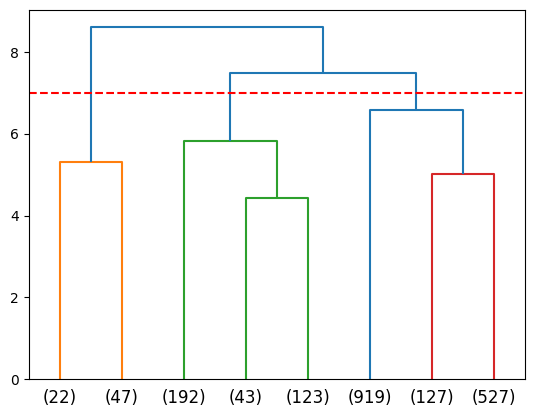

In [29]:
# Calculate the linkage matrix
linked = linkage(df_std, method='complete',) 

# Create the dendrogram plot
r_dendr = dendrogram(linked, truncate_mode='lastp', p=8)

# Draw a cut-off line
cut_off = 7  # Adjust the value as needed
plt.axhline(y=cut_off, color='r', linestyle='--')

# Show the plot
plt.show()

In [30]:
# Apply Agglomerative  Clustering to the dataset
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hier = hier.fit_predict(df_std)

# Add Hierarchical Clusters to the datasets
df_std['Clusters_Hier'] = clusters_hier
df['Clusters_Hier'] = clusters_hier

In [36]:
df_clustered_h = df.copy()
df_clustered_h['Cluster'] = clusters_hier

cluster_h_characteristics = df_clustered_h.groupby('Cluster').agg({
    'Sex': lambda x: (x.sum()/x.count())*100,  # calculate the percentage of '1's ( females)
    'Marital status': lambda x: (x.sum()/x.count())*100,  # calculate the percentage of '1's (married individuals)
    'Age': 'mean',
    'Education': lambda x: x.mode(),
    'Income': 'mean',
    'Occupation': lambda x: x.mode(),
    'Settlement size': lambda x: x.mode()
}).reset_index()

# Renaming the columns
cluster_h_characteristics.rename(columns={
    'Sex': 'Sex (% Female)', 
    'Marital status': 'Marital Status (% Married)', 
    'Age': 'Avg. Age', 
    'Education': 'Education (Mode)', 
    'Income': 'Avg. Income ($)', 
    'Occupation': 'Occupation (Mode)', 
    'Settlement size': 'Settlement Size (Mode)'
}, inplace=True)

cluster_h_characteristics

,Cluster,Sex (% Female),Marital Status (% Married),Avg. Age,Education (Mode),Avg. Income ($),Occupation (Mode),Settlement Size (Mode)
0,0,39.578454,51.053864,52.604215,2,153663.459016,1,1
1,1,62.785637,54.624592,30.899891,1,97155.670294,0,0
2,2,25.688073,41.743119,32.047401,1,133040.489297,1,2


### Silhouette Scores:
This is a measure of how similar an object is to its own cluster compared to other clusters

In [24]:
clusters_kmeans = kmeans_model.fit_predict(df_std)
clusters_hier = hier.fit_predict(df_std)

print("Silhouette Score for K-Means: ", silhouette_score(df_std, clusters_kmeans))
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score(df_std, clusters_hier))

Silhouette Score for K-Means:  0.42235295268245593
Silhouette Score for Hierarchical Clustering:  0.4107398619741848


Please beware that values and clusters may change or switch every time you run the code above. Therefore, it may cause showing different results from the report.

### (Maybe extra) Visualizing the clusters by reducing dimentions with PCA

As we can not plot all the variables because of the dimensionality, applying PCA would be a good idea for visualization.Yet, PCA doesn't directly interpret the meaning of original variables, the result would still be a reduction of dimensionality, but the principal components might not have clear real-world meanings because Our data is combinations of both continuous and encoded categorical variables. 

But still we can have look to the plot:

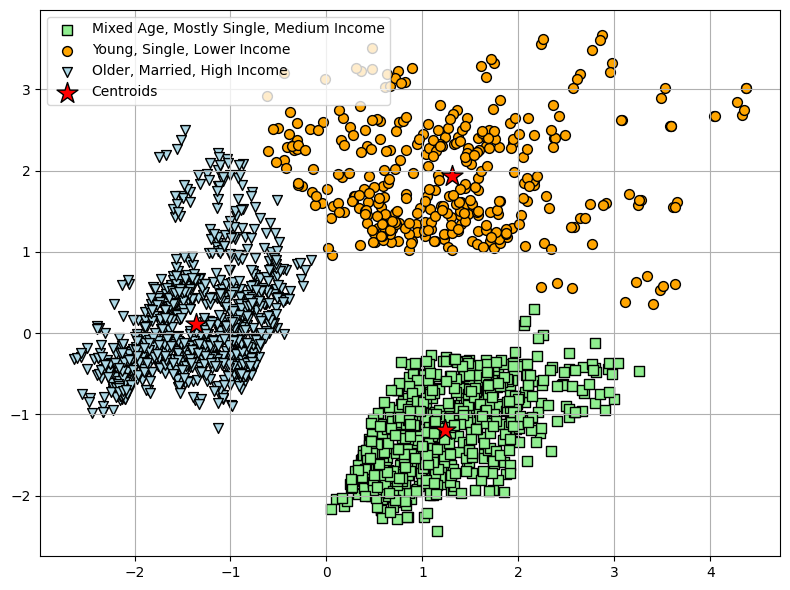

In [25]:
# Apply PCA and get the top 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_std)

# Apply KMeans on PCA results
kmeans_pca = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], s=50, 
            c='lightgreen', marker='s', edgecolor='black', 
            label='Mixed Age, Mostly Single, Medium Income')  # Cluster 1
plt.scatter(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], s=50, 
            c='orange', marker='o', edgecolor='black', 
            label='Young, Single, Lower Income')  # Cluster 2
plt.scatter(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], s=50, 
            c='lightblue', marker='v', edgecolor='black', 
            label='Older, Married, High Income')  # Cluster 3

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=250, marker='*', c='red', edgecolor='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()
